In [1]:
# Import required libraries

# pandas to handle tabular data
import pandas as pd

# pickle to load data saved by the preprocessing phase
import pickle

import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, LSTM
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
# Load the data file to preprossing data

with open('mydata.pickle', 'rb') as f:
    [dict_event, dataframe] = pickle.load(f)

In [3]:
# Data in dictionary

dict_event

{1: 'road closed due to construction',
 2: 'traffic jam',
 3: 'stopped car on the shoulder',
 4: 'road closed',
 5: 'other',
 6: 'object on roadway',
 7: 'major event',
 8: 'pothole',
 9: 'traffic heavier than normal',
 10: 'road construction',
 11: 'fog',
 12: 'accident',
 13: 'slowdown',
 14: 'stopped car',
 15: 'small traffic jam',
 16: 'stopped traffic',
 17: 'heavy traffic',
 18: 'minor accident',
 19: 'medium traffic jam',
 20: 'malfunctioning traffic light',
 21: 'missing sign on the shoulder',
 22: 'animal on the shoulder',
 23: 'animal struck',
 24: 'large traffic jam',
 25: 'hazard on the shoulder',
 26: 'hazard on road',
 27: 'ice on roadway',
 28: 'weather hazard',
 29: 'flooding',
 30: 'road closed due to hazard',
 31: 'hail',
 32: 'huge traffic jam'}

In [4]:
# Show the top 25 data of the dataframe

dataframe.head(25)

,label,events
0,1,"[traffic heavier than normal, heavy traffic, m..."
1,1,"[traffic jam, road construction, stopped car o..."
2,1,[traffic jam]
3,1,[traffic jam]
4,1,"[traffic jam, traffic jam, traffic jam, traffi..."
5,1,"[stopped car on the shoulder, traffic jam, hea..."
6,1,"[stopped car on the shoulder, traffic jam, hea..."
7,1,"[traffic jam, small traffic jam, traffic jam, ..."
8,1,"[heavy traffic, traffic jam, traffic jam, stop..."
9,1,"[heavy traffic, traffic jam, traffic jam, stop..."


In [5]:
# Show the bottom 25 data of the dataframe

dataframe.tail(25)

,label,events
836,0,[traffic jam]
837,0,"[heavy traffic, traffic jam, stopped traffic, ..."
838,0,"[slowdown, heavy traffic, heavy traffic, stopp..."
839,0,[traffic jam]
840,0,[stopped car on the shoulder]
841,0,[traffic jam]
842,0,"[heavy traffic, heavy traffic, heavy traffic, ..."
843,0,"[stopped car on the shoulder, stopped car on t..."
844,0,[traffic jam]
845,0,"[traffic jam, heavy traffic, traffic jam, traf..."


In [6]:
# find the biggest value's index

max_length_event = dataframe.events.apply(len).idxmax()

In [7]:
# Call the variable

print(max_length_event)

105


In [8]:
# Explore the hierarchy of this conflict

max_len_event = dataframe.iloc[max_length_event]

In [9]:
# check out the events

max_len_event.events

['stopped car on the shoulder',
 'heavy traffic',
 'heavy traffic',
 'heavy traffic',
 'slowdown',
 'stopped traffic',
 'heavy traffic',
 'heavy traffic',
 'heavy traffic',
 'heavy traffic',
 'traffic heavier than normal',
 'stopped car on the shoulder',
 'traffic jam',
 'heavy traffic',
 'stopped traffic',
 'stopped traffic',
 'stopped traffic',
 'heavy traffic',
 'traffic jam',
 'stopped car on the shoulder',
 'stopped traffic',
 'stopped traffic',
 'stopped traffic',
 'heavy traffic',
 'traffic heavier than normal',
 'traffic heavier than normal',
 'traffic heavier than normal',
 'traffic heavier than normal',
 'heavy traffic',
 'stopped traffic',
 'traffic heavier than normal',
 'pothole',
 'stopped car on the shoulder',
 'traffic jam',
 'slowdown',
 'stopped traffic',
 'heavy traffic',
 'traffic heavier than normal',
 'traffic jam',
 'traffic jam',
 'stopped car on the shoulder',
 'major event',
 'traffic jam',
 'traffic jam',
 'stopped traffic',
 'heavy traffic',
 'traffic heavie

In [10]:
# get the length of the particular sequence

seq_length = len(max_len_event.events)

In [11]:
# Sequence length

print(seq_length)

84


In [12]:
# Reverse the previously loaded dictionary for maximum productivity

updated_dict = {}

for k, v in dict_event.items():
  updated_dict[v] = k

In [13]:
# check out the updated dictionary data

updated_dict

{'road closed due to construction': 1,
 'traffic jam': 2,
 'stopped car on the shoulder': 3,
 'road closed': 4,
 'other': 5,
 'object on roadway': 6,
 'major event': 7,
 'pothole': 8,
 'traffic heavier than normal': 9,
 'road construction': 10,
 'fog': 11,
 'accident': 12,
 'slowdown': 13,
 'stopped car': 14,
 'small traffic jam': 15,
 'stopped traffic': 16,
 'heavy traffic': 17,
 'minor accident': 18,
 'medium traffic jam': 19,
 'malfunctioning traffic light': 20,
 'missing sign on the shoulder': 21,
 'animal on the shoulder': 22,
 'animal struck': 23,
 'large traffic jam': 24,
 'hazard on the shoulder': 25,
 'hazard on road': 26,
 'ice on roadway': 27,
 'weather hazard': 28,
 'flooding': 29,
 'road closed due to hazard': 30,
 'hail': 31,
 'huge traffic jam': 32}

In [14]:
# create a function that will transform a list of events

def event_idx(list_event):
  list_idxs = []
  
  for event in (list_event):
    my_index = updated_dict[event]
    list_idxs.append(my_index)
    
  # give back a list of numbers
  return list_idxs

In [15]:
# Verify the action on the longest list.

event_idx(max_len_event.events)

[3,
 17,
 17,
 17,
 13,
 16,
 17,
 17,
 17,
 17,
 9,
 3,
 2,
 17,
 16,
 16,
 16,
 17,
 2,
 3,
 16,
 16,
 16,
 17,
 9,
 9,
 9,
 9,
 17,
 16,
 9,
 8,
 3,
 2,
 13,
 16,
 17,
 9,
 2,
 2,
 3,
 7,
 2,
 2,
 16,
 17,
 9,
 3,
 13,
 17,
 17,
 3,
 2,
 13,
 13,
 17,
 3,
 17,
 18,
 3,
 17,
 3,
 17,
 16,
 17,
 9,
 17,
 3,
 9,
 16,
 17,
 17,
 17,
 3,
 13,
 16,
 17,
 3,
 9,
 17,
 18,
 7,
 3,
 3]

In [16]:
# Check the total distict events

len(dict_event)

32

In [17]:
# All event sequences should be converted to lists of integers

dataframe.events.apply(event_idx)

0      [9, 17, 18, 14, 13, 17, 3, 13, 16, 3, 17, 17, ...
1                                             [2, 10, 3]
2                                                    [2]
3                                                    [2]
4                               [2, 2, 2, 2, 2, 2, 2, 9]
                             ...                        
856                    [17, 17, 17, 2, 3, 2, 2, 2, 2, 2]
857                                               [2, 2]
858                                  [2, 2, 9, 17, 2, 2]
859                            [17, 3, 2, 2, 2, 2, 2, 2]
860    [17, 3, 3, 17, 3, 17, 2, 3, 18, 14, 3, 3, 16, ...
Name: events, Length: 1722, dtype: object

In [18]:
# Convert sequences to list

sequences = dataframe.events.apply(event_idx).tolist()

In [19]:
# Check some top sequences

print(sequences[:10])

[[9, 17, 18, 14, 13, 17, 3, 13, 16, 3, 17, 17, 16, 3, 16, 17, 9, 17, 2, 17, 2, 7, 16, 17, 17, 17, 17, 13, 5, 17, 9, 9, 16, 16, 3], [2, 10, 3], [2], [2], [2, 2, 2, 2, 2, 2, 2, 9], [3, 2, 17], [3, 2, 17], [2, 15, 2, 17, 2, 2, 13, 17, 2], [17, 2, 2, 16, 17, 2], [17, 2, 2, 16, 17, 2]]


In [20]:
# Total number of sequence

len(sequences)

1722

In [21]:
# set the maximum length to the length of the longest sequence, and start any shorter sequences with 0s.

data = pad_sequences(sequences, maxlen=seq_length)

In [22]:
# Check the array of data

print(data)

[[ 0  0  0 ... 16 16  3]
 [ 0  0  0 ...  2 10  3]
 [ 0  0  0 ...  0  0  2]
 ...
 [ 0  0  0 ... 17  2  2]
 [ 0  0  0 ...  2  2  2]
 [ 0  0  0 ...  3  3  2]]


In [23]:
# Label column

labels = np.array(dataframe.label)

In [24]:
# Define a random seed point

np.random.seed(28)

In [25]:
# shuffle the sequences and the labels that go with them

num_idx = np.arange(data.shape[0])
np.random.shuffle(num_idx)
data = data[num_idx]
labels = labels[num_idx]

In [26]:
# Train model with 75% of the total data
sample_train = int(len(num_idx) * 0.75)

# Test the model with rest of data
sample_validate = len(num_idx) - sample_train

In [27]:
# Training set division

train_x = data[:sample_train]
train_y = labels[:sample_train]

# Validation set division

validate_x = data[sample_train: sample_train + sample_validate]
validate_y = labels[sample_train: sample_train + sample_validate]

In [28]:
# Training dataset result

print(train_x)

[[ 0  0  0 ...  3  3 17]
 [ 0  0  0 ...  2  2 19]
 [ 0  0  0 ...  0  0  3]
 ...
 [ 0  0  0 ...  0  3  3]
 [ 0  0  0 ...  2  2  2]
 [ 0  0  0 ...  2  2 18]]


In [29]:
# Number of events
# Started from 0. Therefore total actual event is increased by 1.

num_events = len(dict_event) + 1

In [30]:
# Define scalaer vector

scaler_vector = 25

In [31]:
# Initial embedded matrix

scaler_matrix = np.random.rand(num_events, scaler_vector)

In [32]:
# set unit for long-short term memory network

unit = 32

In [33]:
model = Sequential()

# Embedding layer
model.add(Embedding(num_events, scaler_vector))

# LSTM layer
model.add(LSTM(unit))

# Dense layer with sigmoid function
model.add(Dense(1, activation='sigmoid'))

In [34]:
# Handle the Embedding layer's parameters

model.layers[0].set_weights([scaler_matrix])
model.layers[0].trainable = False

In [35]:
# Train the model

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

model_hist = model.fit(train_x, train_y,
                    epochs=200,
                    batch_size=32,
                    validation_data=(validate_x, validate_y))

Epoch 1/200
41/41 [==============================] - 3s 26ms/step - loss: 0.6774 - acc: 0.5941 - val_loss: 0.6549 - val_acc: 0.6125
Epoch 2/200
41/41 [==============================] - 1s 17ms/step - loss: 0.6559 - acc: 0.6212 - val_loss: 0.6480 - val_acc: 0.6218
Epoch 3/200
41/41 [==============================] - 1s 16ms/step - loss: 0.6364 - acc: 0.6414 - val_loss: 0.6319 - val_acc: 0.6543
Epoch 4/200
41/41 [==============================] - 1s 16ms/step - loss: 0.6182 - acc: 0.6731 - val_loss: 0.6074 - val_acc: 0.6752
Epoch 5/200
41/41 [==============================] - 1s 16ms/step - loss: 0.5965 - acc: 0.6793 - val_loss: 0.5774 - val_acc: 0.6937
Epoch 6/200
41/41 [==============================] - 1s 19ms/step - loss: 0.5767 - acc: 0.7126 - val_loss: 0.5584 - val_acc: 0.7100
Epoch 7/200
41/41 [==============================] - 1s 17ms/step - loss: 0.5657 - acc: 0.7188 - val_loss: 0.5874 - val_acc: 0.6845
Epoch 8/200
41/41 [==============================] - 1s 20ms/step - loss: 0.

In [36]:
# Save the output in given file

model.save("untrainable_model.h5")

In [37]:
# Imagine the accuracy and loss curves

acc = model_hist.history['acc']
val_acc = model_hist.history['val_acc']
loss = model_hist.history['loss']
val_loss = model_hist.history['val_loss']

epochs = range(1, len(acc) + 1)

<Figure size 640x480 with 0 Axes>

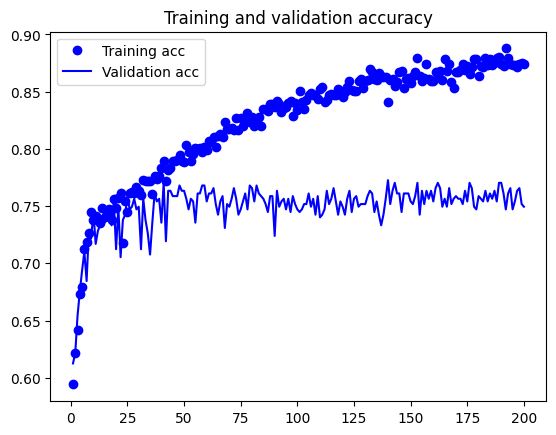

<Figure size 640x480 with 0 Axes>

In [38]:
# Plot the accuracy graph of untrainable model

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

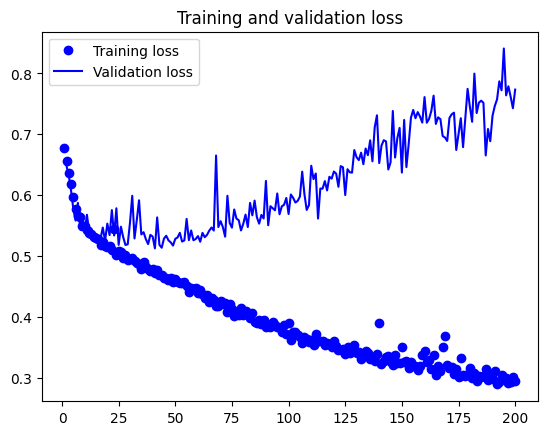

In [39]:
# Plot the loss graph of untrainable model

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [40]:
# Set unit

unit = 32

In [41]:
# Embedding layer for training

model = Sequential()
model.add(Embedding(num_events, scaler_vector))
model.add(LSTM(unit))
model.add(Dense(1, activation='sigmoid'))

In [42]:
# Set trainable patameter to TRUE 

model.layers[0].set_weights([scaler_matrix])
model.layers[0].trainable = True

In [43]:
# Train the model over again

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

model_hist = model.fit(train_x, train_y,
                    epochs=200,
                    batch_size=32,
                    validation_data=(validate_x, validate_y))

Epoch 1/200
41/41 [==============================] - 3s 32ms/step - loss: 0.6726 - acc: 0.5964 - val_loss: 0.6465 - val_acc: 0.6473
Epoch 2/200
41/41 [==============================] - 1s 22ms/step - loss: 0.6406 - acc: 0.6491 - val_loss: 0.6121 - val_acc: 0.6589
Epoch 3/200
41/41 [==============================] - 1s 22ms/step - loss: 0.5997 - acc: 0.6987 - val_loss: 0.5758 - val_acc: 0.7030
Epoch 4/200
41/41 [==============================] - 1s 22ms/step - loss: 0.5688 - acc: 0.7142 - val_loss: 0.6098 - val_acc: 0.6798
Epoch 5/200
41/41 [==============================] - 1s 22ms/step - loss: 0.5589 - acc: 0.7273 - val_loss: 0.5443 - val_acc: 0.7378
Epoch 6/200
41/41 [==============================] - 1s 23ms/step - loss: 0.5438 - acc: 0.7351 - val_loss: 0.5370 - val_acc: 0.7448
Epoch 7/200
41/41 [==============================] - 1s 22ms/step - loss: 0.5368 - acc: 0.7335 - val_loss: 0.5413 - val_acc: 0.7494
Epoch 8/200
41/41 [==============================] - 1s 21ms/step - loss: 0.

In [44]:
# save the result in a file

model.save("trainable_model.h5")

In [45]:
# Imagine the accuracy and loss curves

acc = model_hist.history['acc']
val_acc = model_hist.history['val_acc']
loss = model_hist.history['loss']
val_loss = model_hist.history['val_loss']

epochs = range(1, len(acc) + 1)

<Figure size 640x480 with 0 Axes>

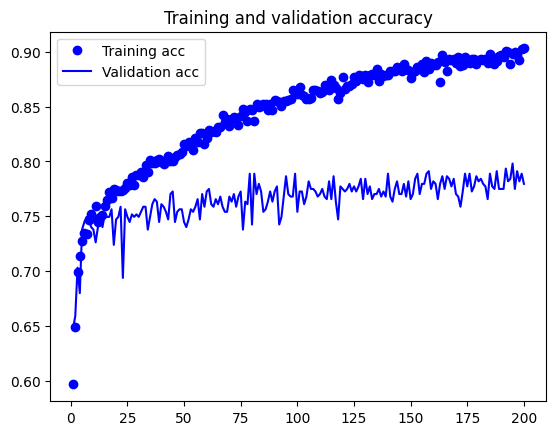

<Figure size 640x480 with 0 Axes>

In [46]:
# Plot the accuracy graph of trainable model

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

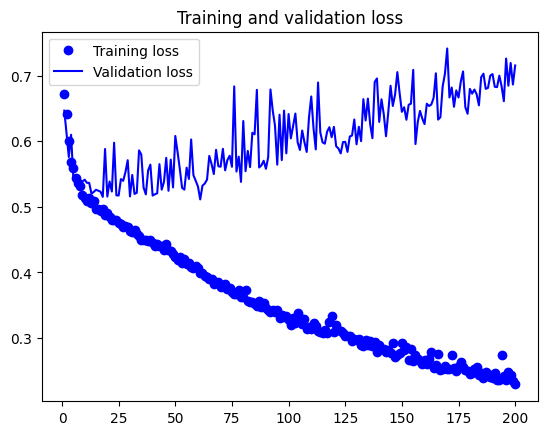

In [47]:
# Plot the loss graph of trainable model

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [48]:
# set the unit

unit = 32

In [49]:
# Embedding layer for training to terminate over-fitting

model = Sequential()
model.add(Embedding(num_events, scaler_vector))
model.add(LSTM(unit, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

In [50]:
# keep the parameter trainable of Embedding Layer to True

model.layers[0].set_weights([scaler_matrix])
model.layers[0].trainable = True

In [51]:
# Train the model again

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

model_hist = model.fit(train_x, train_y,
                    epochs=200,
                    batch_size=32,
                    validation_data=(validate_x, validate_y))

Epoch 1/200
41/41 [==============================] - 4s 51ms/step - loss: 0.6656 - acc: 0.5957 - val_loss: 0.6675 - val_acc: 0.5568
Epoch 2/200
41/41 [==============================] - 2s 44ms/step - loss: 0.6320 - acc: 0.6530 - val_loss: 0.5989 - val_acc: 0.7146
Epoch 3/200
41/41 [==============================] - 2s 45ms/step - loss: 0.6018 - acc: 0.6855 - val_loss: 0.5754 - val_acc: 0.7216
Epoch 4/200
41/41 [==============================] - 2s 45ms/step - loss: 0.5825 - acc: 0.6964 - val_loss: 0.5596 - val_acc: 0.7378
Epoch 5/200
41/41 [==============================] - 2s 46ms/step - loss: 0.5711 - acc: 0.7103 - val_loss: 0.5493 - val_acc: 0.7100
Epoch 6/200
41/41 [==============================] - 2s 43ms/step - loss: 0.5594 - acc: 0.7188 - val_loss: 0.5406 - val_acc: 0.7262
Epoch 7/200
41/41 [==============================] - 2s 48ms/step - loss: 0.5506 - acc: 0.7374 - val_loss: 0.5348 - val_acc: 0.7401
Epoch 8/200
41/41 [==============================] - 2s 54ms/step - loss: 0.

In [52]:
# save the result in a file

model.save("trainable_dropout_model.h5")

In [53]:
# Imagine the accuracy and loss curves of updated dropout trained model

acc = model_hist.history['acc']
val_acc = model_hist.history['val_acc']
loss = model_hist.history['loss']
val_loss = model_hist.history['val_loss']

epochs = range(1, len(acc) + 1)

<Figure size 640x480 with 0 Axes>

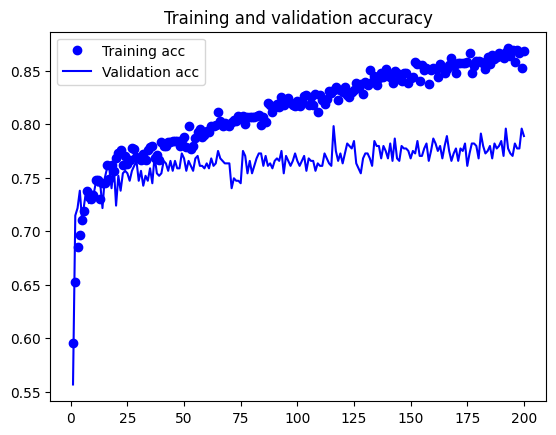

<Figure size 640x480 with 0 Axes>

In [54]:
# Plot the accuracy graph of trainable model

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

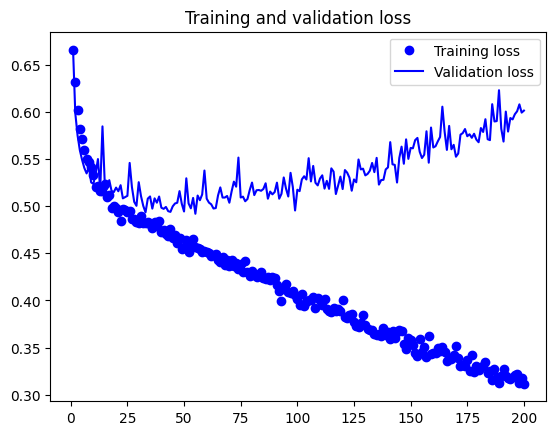

In [55]:
# Plot the loss graph of trainable model

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()